### IMDB Dataset [URL](http://ai.stanford.edu/~amaas/data/sentiment/) for Sentiment analysis for movies reviews 

### Word embedding projection [URL](http://projector.tensorflow.org/)

In [2]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np

### Install the tenser flow dataset using below pip code
pip install -q tensorflow-datasets

### Import Imdb review dataset from tensorflow library

In [0]:
import tensorflow_datasets as tf_ds

In [0]:
imdb,info=tf_ds.load("imdb_reviews",with_info=True,as_supervised=True)

### Divide the dataset into training and testing set 25k on train and 25 k on test

In [0]:
data_train,data_test=imdb['train'],imdb['test']

In [0]:
x_train=[] # Sentance of review of training data (data_train)
y_train=[] # label of review of training data (data_train)
x_test=[] # Sentance of review of testing data (data_test)
y_test=[] # label of review of testing data (data_test)

### Run the for loop and append each sentance and lables in array

In [0]:
for x,y in data_train:
    x_train.append(str(x.numpy()))
    y_train.append(str(y.numpy()))

In [0]:
for x,y in data_test:
    x_test.append(str(x.numpy()))
    y_test.append(str(y.numpy()))

### Converting all the labels(y_train,y_test) into numpy array

In [0]:
y_train_final=np.array(y_train)
y_test_final=np.array(y_test)

In [10]:
y_train_final.dtype

dtype('<U1')

In [0]:
y_train_final=y_train_final.astype('int32') 
y_test_final=y_test_final.astype('int32')

### Declearing the important variable for word imbedding 

In [0]:
vocab_size=15000
embed_dim=64
max_len=140
trunc_type='post'
oov_tok="<OOV>"
num_epochs = 10
batch_size=64

### Tokenize the sentance into word  and Pad the data to form the same length of sequience of data

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [0]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
#fit_on_texts will take the data and encode it
tokenizer.fit_on_texts(x_train)
#it will provide the word index property in dectionary form
word_index=tokenizer.word_index

In [0]:
x_train_sequences=tokenizer.texts_to_sequences(x_train)
x_train_padded=pad_sequences(x_train_sequences,maxlen=max_len,truncating=trunc_type)

In [0]:
x_test_sequences=tokenizer.texts_to_sequences(x_test)
x_test_padded=pad_sequences(x_test_sequences,maxlen=max_len)

### Building a keras model

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=max_len),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")    
])

### How can we use the vector

In [18]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           960000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,034,369
Trainable params: 1,034,369
Non-trainable params: 0
_________________________________________________________________


In [0]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01) 

modelCheckpoint = ModelCheckpoint('word_embedding_lstm.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [20]:
history=model.fit(x_train_padded, y_train_final,batch_size = batch_size,callbacks=[earlyStopping,modelCheckpoint], epochs=num_epochs, validation_data=(x_test_padded, y_test_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


24960/25000 [============================>.] - ETA: 0s - loss: 0.6589 - acc: 0.5773
Epoch 00001: val_acc improved from -inf to 0.78072, saving model to word_embedding_lstm.hdf5
25000/25000 [==============================] - 238s 10ms/sample - loss: 0.6586 - acc: 0.5776 - val_loss: 0.4688 - val_acc: 0.7807
Epoch 2/10
24960/25000 [============================>.] - ETA: 0s - loss: 0.3852 - acc: 0.8339
Epoch 00002: val_acc improved from 0.78072 to 0.83956, saving model to word_embedding_lstm.hdf5
25000/25000 [==============================] - 232s 9ms/sample - loss: 0.3853 - acc: 0.8338 - val_loss: 0.3595 - val_acc: 0.8396
Epoch 3/10
24960/25000 [============================>.] - ETA: 0s - loss: 0.2861 - acc: 0.8876
Epoch 00003: val_acc improved from 0.83956 to 0.85200, saving model to word_embedding_lstm.hdf5
25000/25000 [==============================] - 243s 10ms/sample - loss: 0.2862 - acc: 0.8876 - val_loss: 0.3404 - val_acc: 0.8520
Epoch 4/10
24960/25000 [============================

In [0]:
#history=model.fit(x_train_padded, y_train_final,epochs=num_epochs, validation_data=(x_test_padded, y_test_final))

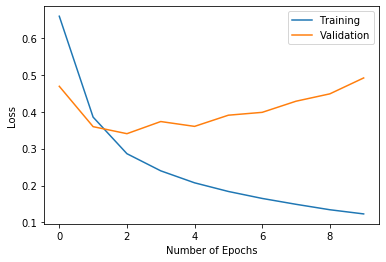

In [22]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='Training') 
plt.plot(history.history['val_loss'], label='Validation') 
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

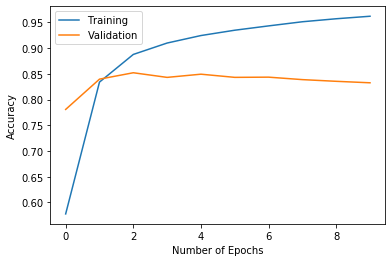

In [23]:
plt.plot(history.history['acc'], label='Training') 
plt.plot(history.history['val_acc'], label='Validation') 
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(15000, 64)


In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(x_train_padded[1]))
print(x_train[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seeme

### here we are just revesing the order of word and number (word:number to number:word)

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [27]:
sentence = "I think this is good."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [790], [2019], [11], [2929], [2184], [], [790], [2019], [11], [579], [], [11], [579], [], [1275], [1003], [1003], [956], []]
